# 4.10 Instacart: Final Report

## Part 1

In [3]:
# Import libraries
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
import seaborn as sns
import scipy

In [4]:
# Import data
path = r'/Users/ol/anaconda_projects/2025_01 Instacart Basket Analysis'
df_cust = pd.read_pickle(os.path.join(path, '02 Data', 'Prepared Data', 'ords_prods_cust_merge.pkl'))

### Task 3

3.1 Segment customers into U.S. regions based on the "State" column.

In [7]:
# List of states in the Northeast region
northeast_states = [
    'Maine', 'New Hampshire', 'Vermont', 
    'Massachusetts', 'Rhode Island', 'Connecticut', 
    'New York', 'Pennsylvania', 'New Jersey'
]

# Assign the 'Northeast' region for matching states
df_cust.loc[df_cust['State'].isin(northeast_states), 'Region'] = 'Northeast'

In [8]:
# List of states in the Midwest region
midwest_states = [
    'Wisconsin', 'Michigan', 'Illinois', 'Indiana', 'Ohio',
    'North Dakota', 'South Dakota', 'Nebraska', 'Kansas',
    'Minnesota', 'Iowa', 'Missouri'
]

# Assign the 'Midwest' region for matching states
df_cust.loc[df_cust['State'].isin(midwest_states), 'Region'] = 'Midwest'

In [9]:
# List of states in the South region
south_states = [
    'Delaware', 'Maryland', 'District of Columbia', 'Virginia', 
    'West Virginia', 'North Carolina', 'South Carolina', 
    'Georgia', 'Florida', 'Kentucky', 'Tennessee', 
    'Mississippi', 'Alabama', 'Oklahoma', 'Texas', 
    'Arkansas', 'Louisiana'
]

# Assign the 'South' region for matching states
df_cust.loc[df_cust['State'].isin(south_states), 'Region'] = 'South'

In [10]:
# List of states in the West region
west_states = [
    'Idaho', 'Montana', 'Wyoming', 'Nevada', 'Utah', 
    'Colorado', 'Arizona', 'New Mexico', 
    'Alaska', 'Washington', 'Oregon', 'California', 'Hawaii'
]

# Assign the 'West' region for matching states
df_cust.loc[df_cust['State'].isin(west_states), 'Region'] = 'West'

3.2 Compare spending habits across U.S. regions.

In [12]:
# Crosstab region to spending flag
crosstab = pd.crosstab(df_cust['Region'], df_cust['spender_flag'], dropna = False)
crosstab.to_clipboard()

# Export
df_cust.to_pickle(os.path.join(path, '02 Data','Prepared Data', 'df_cust_crosstab.pkl'))

### Task 4

Create a flag for low-activity customers (< 5 orders) and filter them out.

In [15]:
# Create a flag for customers
df_cust.loc[df_cust['max_order'] < 5, 'Activity_flag'] = 'low-activity customer'
df_cust.loc[df_cust['max_order'] >= 5, 'Activity_flag'] = 'high-activity customer'
# Exclude low-activity customers
df_cust_excl = df_cust[df_cust['Activity_flag'] != 'low-activity customer']

# Export
df_cust_excl.to_pickle(os.path.join(path, '02 Data','Prepared Data', 'high_act_cust.pkl'))

### Task 5

Create a profiling variable based on Age, Income, and Number of dependents.

In [18]:
# Create an age group variable
df_cust_excl.loc[(df_cust_excl['Age'] >= 18) & (df_cust_excl['Age'] <= 24), 'Age_group'] = 'Youth'
df_cust_excl.loc[(df_cust_excl['Age'] >= 25) & (df_cust_excl['Age'] <= 34), 'Age_group'] = 'Young Adults'
df_cust_excl.loc[(df_cust_excl['Age'] >= 35) & (df_cust_excl['Age'] <= 44), 'Age_group'] = 'Adults'
df_cust_excl.loc[(df_cust_excl['Age'] >= 45) & (df_cust_excl['Age'] <= 54), 'Age_group'] = 'Middle-aged Adults'
df_cust_excl.loc[(df_cust_excl['Age'] >= 55) & (df_cust_excl['Age'] <= 64), 'Age_group'] = 'Older Adults'
df_cust_excl.loc[df_cust_excl['Age'] >= 65, 'Age_group'] = 'Elderly'

# Calculate the distribution of age groups
age_group_counts = df_cust_excl['Age_group'].value_counts()

# Check 
age_group_counts

/var/folders/rq/wssbbcbj1m94bfrbl9rrb7300000gn/T/ipykernel_87012/2538675802.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_cust_excl.loc[(df_cust_excl['Age'] >= 18) & (df_cust_excl['Age'] <= 24), 'Age_group'] = 'Youth'


Age_group
Elderly               8195544
Middle-aged Adults    4887564
Adults                4836674
Young Adults          4827101
Older Adults          4802487
Youth                 3415194
Name: count, dtype: int64

In [19]:
# Create an income group variable
df_cust_excl.loc[df_cust_excl['Income'] <= 30000, 'income_group'] = 'Low Income'
df_cust_excl.loc[(df_cust_excl['Income'] > 30000) & (df_cust_excl['Income'] <= 75000), 'income_group'] = 'Lower Middle Income'
df_cust_excl.loc[(df_cust_excl['Income'] > 75000) & (df_cust_excl['Income'] <= 150000), 'income_group'] = 'Upper Middle Income'
df_cust_excl.loc[df_cust_excl['Income'] > 150000, 'income_group'] = 'High Income'

# Calculate the counts of each income group
income_group_counts = df_cust_excl['income_group'].value_counts()

# Check
income_group_counts

/var/folders/rq/wssbbcbj1m94bfrbl9rrb7300000gn/T/ipykernel_87012/3533780687.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_cust_excl.loc[df_cust_excl['Income'] <= 30000, 'income_group'] = 'Low Income'


income_group
Upper Middle Income    17163296
Lower Middle Income     9712602
High Income             3894534
Low Income               194132
Name: count, dtype: int64

In [20]:
# Create a dependents flag
df_cust_excl.loc[df_cust_excl['Number of Dependents'] == 0, 'Dependants_flag'] = 'no dependants'
df_cust_excl.loc[df_cust_excl['Number of Dependents'] >= 1, 'Dependants_flag'] = 'has dependants'

# Calculate the distribution of the dependents flag
dependants_flag_counts = df_cust_excl['Dependants_flag'].value_counts()

/var/folders/rq/wssbbcbj1m94bfrbl9rrb7300000gn/T/ipykernel_87012/499844580.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_cust_excl.loc[df_cust_excl['Number of Dependents'] == 0, 'Dependants_flag'] = 'no dependants'


In [21]:
# Department_mapping 
department_mapping = pd.DataFrame({
    'department_id': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21],
    'Department': [
        'frozen', 'other', 'bakery', 'produce', 'alcohol', 'international',
        'beverages', 'pets', 'dry goods pasta', 'bulk', 'personal care',
        'meat seafood', 'pantry', 'breakfast', 'canned goods', 'dairy eggs',
        'household', 'babies', 'snacks', 'deli', 'missing'
    ]
})

# Merge the department_mapping with df_cust_excl
df_cust_excl_dep = df_cust_excl.merge(department_mapping, on='department_id', how='left')

# Export 
df_cust_excl_dep.to_pickle(os.path.join(path,'02 Data','Prepared Data','df_cust_excl_dep'))

### Task 6

Create an appropriate visualization to show the distribution of profiles.

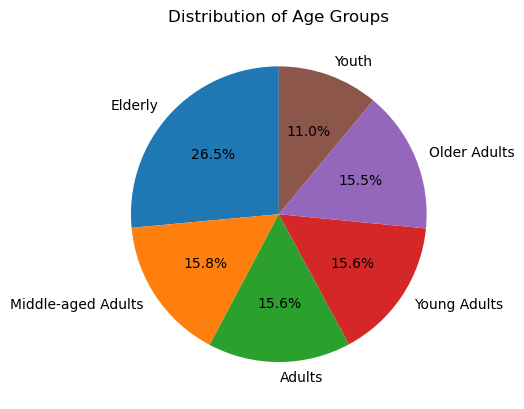

In [24]:
# Make a pie chart showing the distribution of age groups
age_group_distribution_pie = age_group_counts.plot.pie(
    autopct='%1.1f%%',
    labels=age_group_counts.index,
    startangle=90,
)
plt.ylabel('')
plt.title('Distribution of Age Groups')
plt.show()

# Export
age_group_distribution_pie.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', 'age_group_distribution_pie.png'))

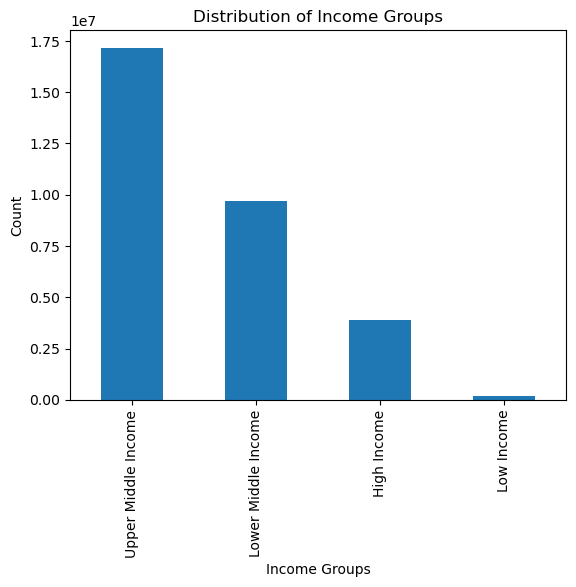

In [25]:
# Create a bar chart for the distribution of income groups
income_group_counts = df_cust_excl['income_group'].value_counts(dropna=False) 
#print(type(income_group_counts))
# print(df_cust_excl['income_group'].value_counts(dropna=False) )
income_group_distribution_bar = income_group_counts.plot.bar()
plt.title('Distribution of Income Groups')
plt.xlabel('Income Groups')
plt.ylabel('Count')
plt.show()

# Export
income_group_distribution_bar.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', 'income_group_counts'))

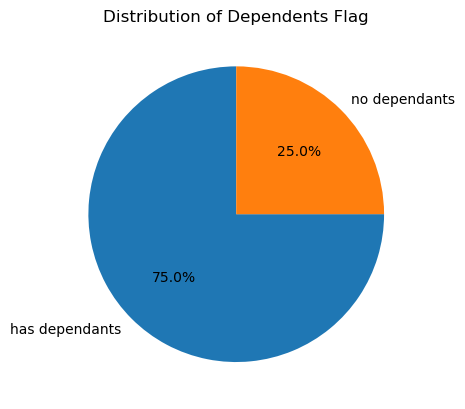

In [26]:
# Create a pie chart showing the distribution of the dependents flag
dependants_flag_distribution_pie = dependants_flag_counts.plot.pie(
    autopct='%1.1f%%',
    labels=dependants_flag_counts.index,
    startangle=90,
)
plt.ylabel('')  # Hide the y-label
plt.title('Distribution of Dependents Flag')
plt.show()

# Export
dependants_flag_distribution_pie.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', 'dependants_flag_distribution_pie'))

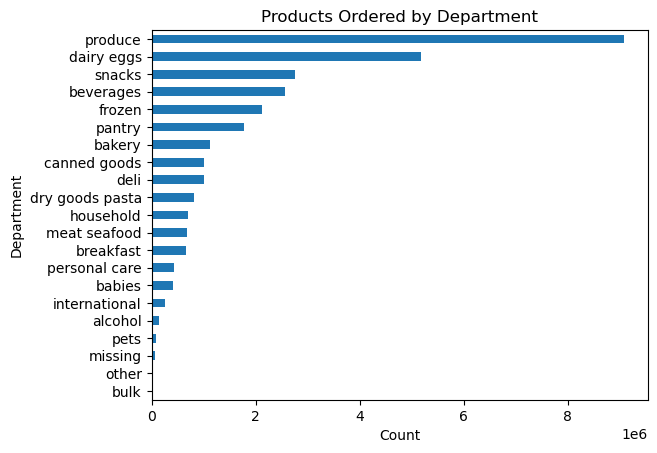

In [27]:
# Create a bar chart for frequency of orders vs department
depts_bar = df_cust_excl_dep['Department'].value_counts(ascending=True).plot(
    kind='barh',
    xlabel='Count',
    title='Products Ordered by Department'
)
plt.show()

# Export
depts_bar.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', 'depts_bar'))

### Task 7

Aggregate the max, mean, and min variables on a customer-profile level for usage frequency and expenditure.

In [30]:
# Create a subset of customer profiles with total prices for each order
customer_profile = df_cust_excl_dep.groupby(
    ['user_id', 'Gender', 'State', 'Region', 'Number of Dependents', 'Family Status', 
     'Age_group', 'order_number', 'orders_day_of_week', 'order_hour_of_day', 
     'loyalty_flag', 'customer_frequency', 'Dependants_flag', 'income_group', 
     'spender_flag']
)['prices'].sum().reset_index()

# Check
customer_profile.head()

user_id  Gender    State Region  Number of Dependents Family Status  \
0        1  Female  Alabama  South                     3       married   
1        1  Female  Alabama  South                     3       married   
2        1  Female  Alabama  South                     3       married   
3        1  Female  Alabama  South                     3       married   
4        1  Female  Alabama  South                     3       married   

      Age_group  order_number  orders_day_of_week  order_hour_of_day  \
0  Young Adults             1                   2                  8   
1  Young Adults             2                   3                  7   
2  Young Adults             3                   3                 12   
3  Young Adults             4                   4                  7   
4  Young Adults             5                   4                 15   

   loyalty_flag  customer_frequency Dependants_flag         income_group  \
0  New customer                20.0  has dependants  Lower Middle Income   
1  New customer                20.0  has dependants  Lower Middle Income   
2  New customer                20.0  has dependants  Lower Middle Income   
3  New customer                20.0  has dependants  Lower Middle Income   
4  New customer                20.0  has dependants  Lower Middle Income   

  spender_flag  prices  
0  Low_spender    31.6  
1  Low_spender    35.4  
2  Low_spender    28.2  
3  Low_spender    26.0  
4  Low_spender    57.0

In [31]:
# Aggregate expenditure variables for customer profiles
customer_agg = customer_profile.groupby('user_id').agg({
    'order_number': ['max', 'min', 'mean'],
    'prices': ['max', 'min', 'mean']
}).reset_index()

# Check
customer_agg.head()

user_id order_number           prices                  
                   max min  mean    max   min        mean
0       1           10   1   5.5   63.1  25.0   37.570000
1       2           14   1   7.5  213.1  19.0  104.685714
2       3           12   1   6.5  107.2  30.7   60.116667
3       4            5   1   3.0   63.4  10.8   29.540000
4       7           20   1  10.5  166.7   6.3   76.910000

### Task 8

Compare customer profiles with regions and departments.

<Figure size 1400x1000 with 0 Axes>

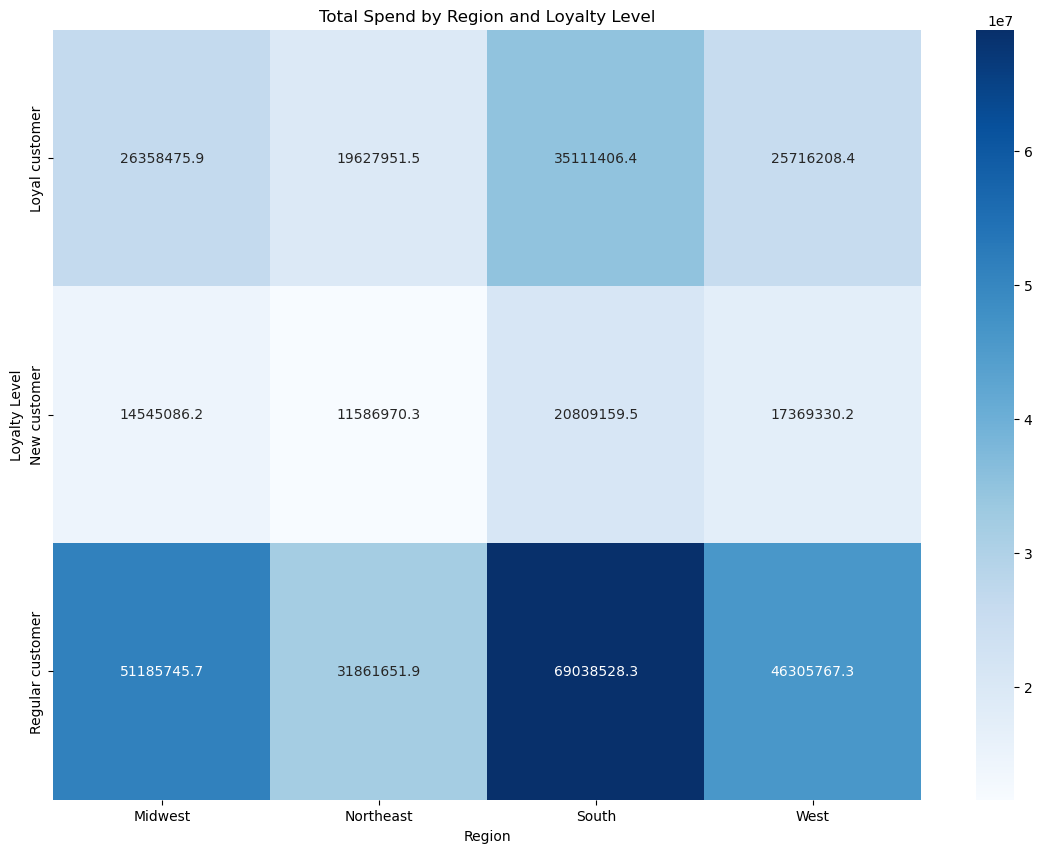

In [34]:
# Create a crosstab to calculate total spend by Region and Loyalty_Flag
heatmap_data = pd.crosstab(
    df_cust_excl_dep['loyalty_flag'], 
    df_cust_excl_dep['Region'], 
    values=df_cust_excl_dep['prices'], 
    aggfunc='sum'
).fillna(0)

# Create a named figure for the heatmap
fig_heatmap = plt.figure(figsize=(14, 10))

# Plot the heatmap
plt.figure(figsize=(14, 10))
sns.heatmap(heatmap_data, annot=True, cmap='Blues', fmt='.1f')
plt.title('Total Spend by Region and Loyalty Level')
plt.xlabel('Region')
plt.ylabel('Loyalty Level')
plt.show()

# Export
fig_heatmap.savefig(os.path.join(path, '04 Analysis', 'Visualizations', 'fig_heatmap.png'))

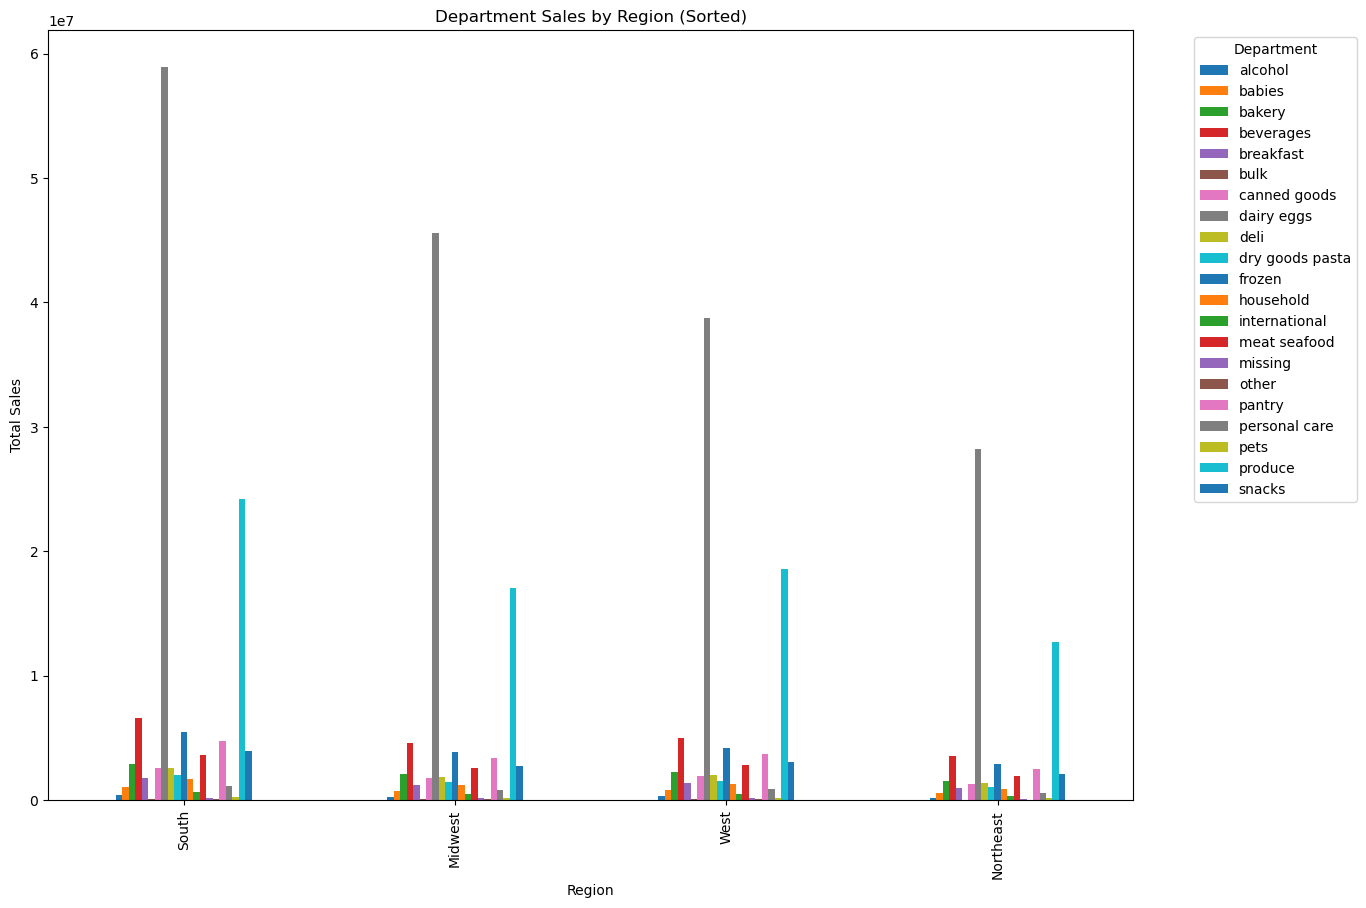

<Figure size 640x480 with 0 Axes>

In [35]:
# Group by Region and Department to calculate total sales
region_dept_cross = pd.crosstab(
    df_cust_excl_dep['Region'],
    df_cust_excl_dep['Department'],
    values=df_cust_excl_dep['prices'],
    aggfunc='sum'
).fillna(0)

# Sort regions by total sales
region_dept_cross['Total_Sales'] = region_dept_cross.sum(axis=1)
region_dept_cross = region_dept_cross.sort_values(by='Total_Sales', ascending=False).drop(columns='Total_Sales')

# Create a vertical bar chart
region_dept_bar = region_dept_cross.plot(kind='bar', figsize=(14, 10))

# Add title and labels
plt.title('Department Sales by Region (Sorted)')
plt.xlabel('Region')
plt.ylabel('Total Sales')

# Move legend outside the plot
plt.legend(title='Department', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()

# Export
plt.savefig(os.path.join(path, '04 Analysis', 'Visualizations', 'region_dept_cros'))

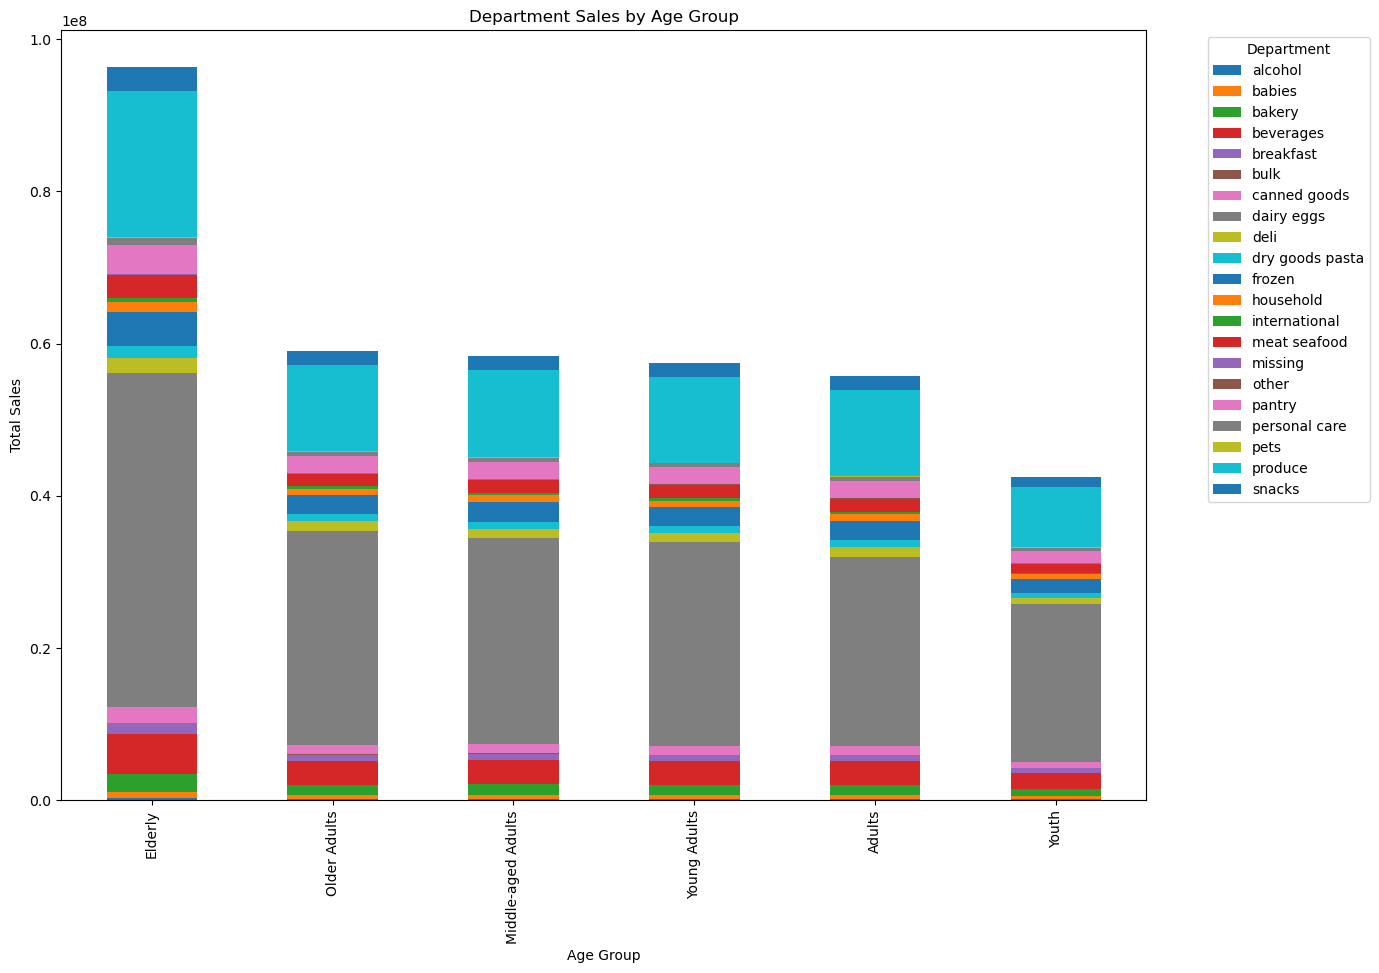

<Figure size 640x480 with 0 Axes>

In [36]:
# Group by Age Group and Department to calculate total sales
age_dept_cross = pd.crosstab(
    df_cust_excl_dep['Age_group'], 
    df_cust_excl_dep['Department'], 
    values=df_cust_excl_dep['prices'], 
    aggfunc='sum'
).fillna(0)

# Sort age groups by total sales (sum across all departments)
age_dept_cross['Total_Sales'] = age_dept_cross.sum(axis=1)
age_dept_cross = age_dept_cross.sort_values(by='Total_Sales', ascending=False).drop(columns='Total_Sales')

# Plot a stacked bar chart
age_dept_cross.plot(kind='bar', stacked=True, figsize=(14, 10))
plt.title('Department Sales by Age Group')
plt.xlabel('Age Group')
plt.ylabel('Total Sales')
plt.legend(title='Department', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()

# Export
plt.savefig(os.path.join(path, '04 Analysis', 'Visualizations', 'age_dept_cross'))

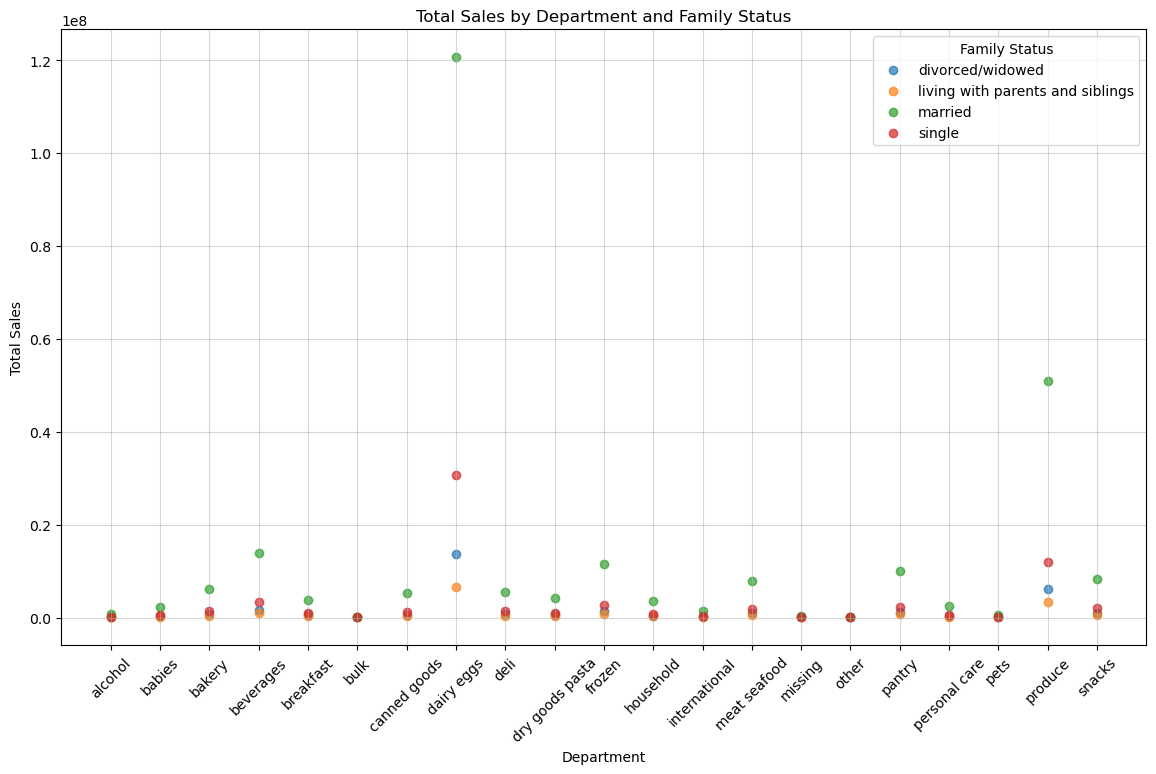

<Figure size 640x480 with 0 Axes>

In [41]:
# Group by Family Status and Department to calculate total sales
family_dept_cross = pd.crosstab(
    df_cust_excl_dep['Family Status'], 
    df_cust_excl_dep['Department'], 
    values=df_cust_excl_dep['prices'], 
    aggfunc='sum'
).fillna(0)

# Reshape the data for plotting (convert crosstab to a flat DataFrame)
scatter_data = family_dept_cross.reset_index().melt(
    id_vars=['Family Status'], 
    var_name='Department', 
    value_name='Total Sales'
)

# Plot scatterplot
plt.figure(figsize=(14, 8))
for family_status in scatter_data['Family Status'].unique():
    subset = scatter_data[scatter_data['Family Status'] == family_status]
    plt.scatter(subset['Department'], subset['Total Sales'], label=family_status, alpha=0.7)

# Add labels and title
plt.title('Total Sales by Department and Family Status')
plt.xlabel('Department')
plt.ylabel('Total Sales')
plt.xticks(rotation=45)
plt.legend(title='Family Status')
plt.grid(alpha=0.5)
plt.show()

# Export
plt.savefig(os.path.join(path, '04 Analysis', 'Visualizations', 'family_dept_cross.png'), bbox_inches='tight')